# Magnitude of impedance and transfer function

dict_keys(['measured', 'fitted'])


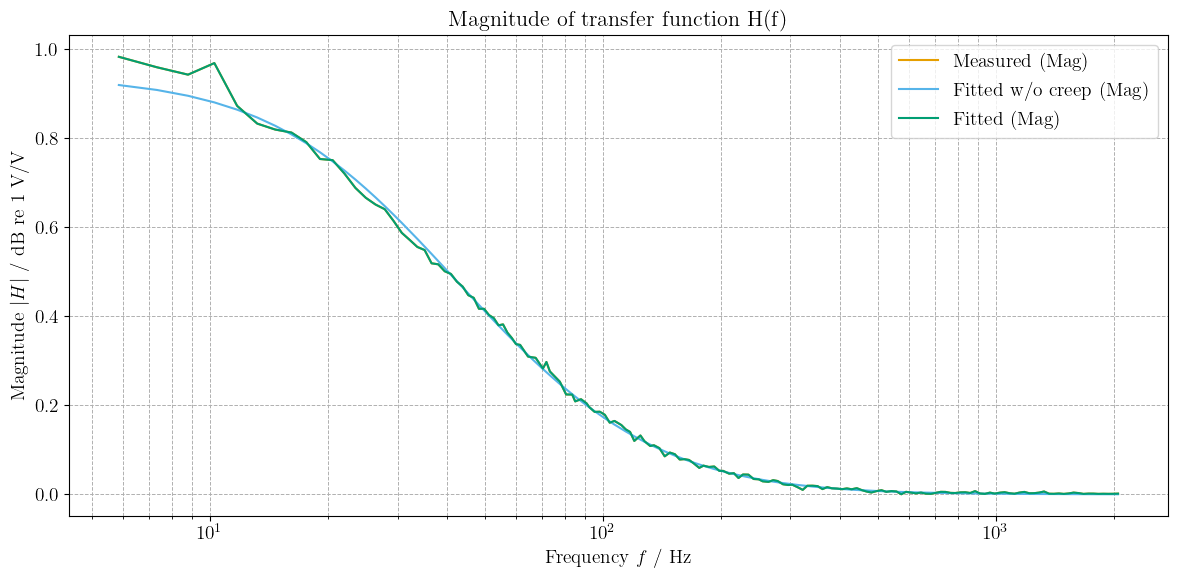

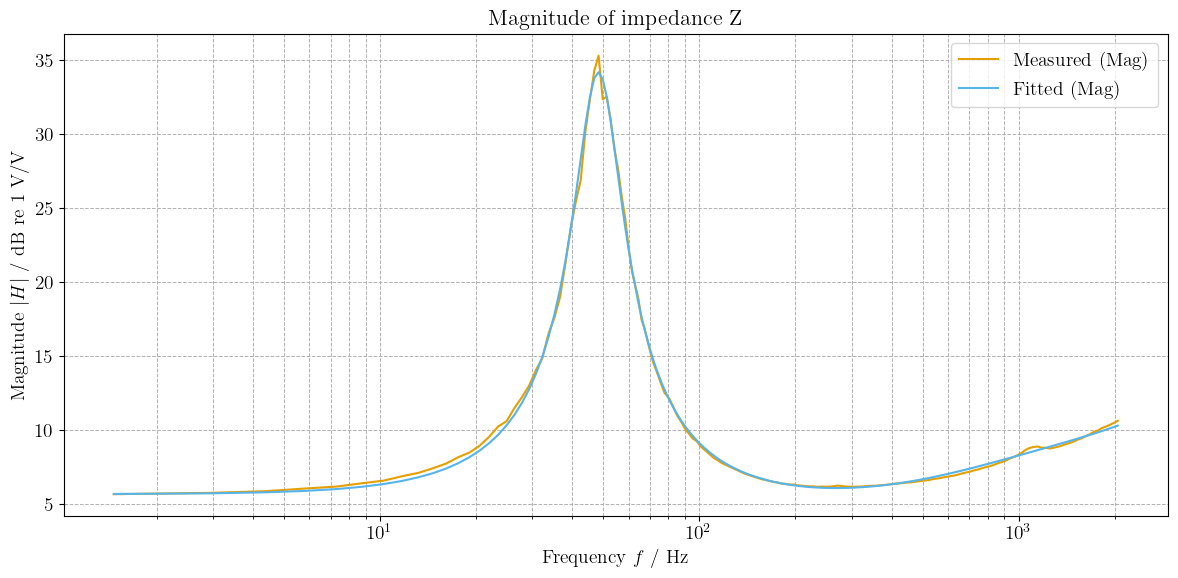

In [2]:
import klippel
import matplotlib.pyplot as plt 
import engutil

Z = klippel.load_klippel_impedance_tf("data/lab b/measurement 1 - linear/Magnitude of electric impedance Z(f).txt")
H = klippel.load_klippel_displacement_tf("data/lab b/measurement 1 - linear/Magnitude of transfer function Hx(f)= X(f)U(f).txt")

print(Z.keys())

f_H_measured = H["measured"]["frequency"].to_numpy()
Hmag_measured = H["measured"]["value"].to_numpy()
Hmag_fitted_wo_creep = H["fitted without creep"]["value"].to_numpy()
Hmag_fitted = H["measured"]["value"].to_numpy()


f_Z_measured = Z["measured"]["frequency"].to_numpy()
Zmag_measured = Z["measured"]["value"].to_numpy()
Zmag_fitted = Z["fitted"]["value"].to_numpy()

# f_fitted = Z["fitted"]["frequency"].to_numpy()
# Zmag_fitted = Z["fitted"]["value"].to_numpy()

engutil.plot_bode(f_H_measured, [(Hmag_measured, None), (Hmag_fitted_wo_creep, None), (Hmag_fitted, None)], title="Magnitude of transfer function H(f)", legends=["Measured", "Fitted w/o creep", "Fitted"])
engutil.plot_bode(f_Z_measured, [(Zmag_measured, None), (Zmag_fitted, None)], title="Magnitude of impedance Z", legends=["Measured", "Fitted"])

# Spectrum of current I(f)

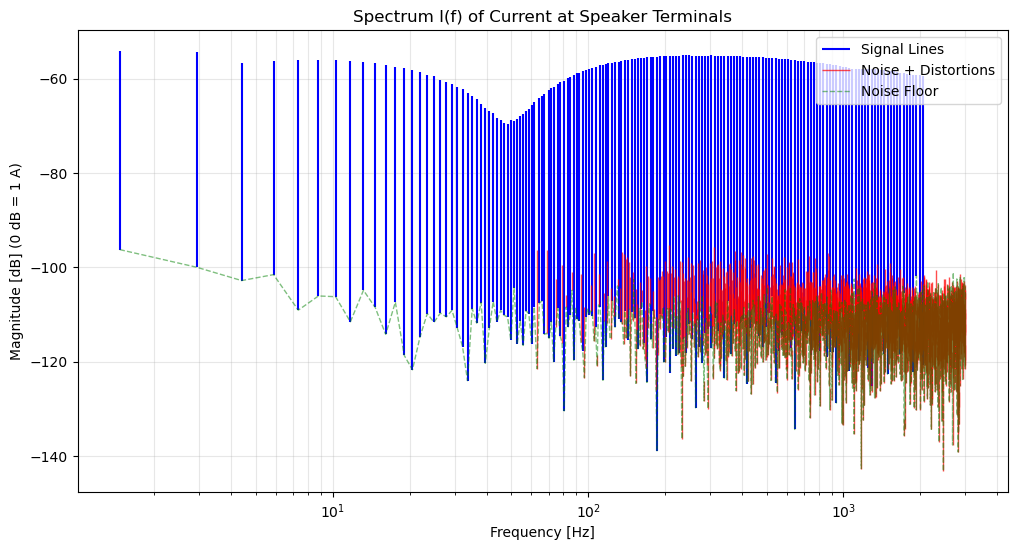

In [2]:

data_current_tf = klippel.load_klippel_spectrum_tf("data/lab b/measurement 1 - linear/Spectrum I(f) of current at speaker terminals.txt")
plt.figure(figsize=(12, 6))

# ---------------------------------------------------------
# 1. PLOT SIGNAL (Using Vertical Lines)
# ---------------------------------------------------------
sig_df = data_current_tf['signal']

# We assume the data assumes a pattern of [Top, Bottom, Top, Bottom...]
# We separate them using array slicing [::2] (evens) and [1::2] (odds)
freqs = sig_df['freq'].iloc[::2].values
top_db = sig_df['db'].iloc[::2].values
bottom_db = sig_df['db'].iloc[1::2].values

# Safety check: ensure arrays are same length (in case file ended oddly)
min_len = min(len(freqs), len(top_db), len(bottom_db))
freqs = freqs[:min_len]
top_db = top_db[:min_len]
bottom_db = bottom_db[:min_len]

# vlines takes (x, ymin, ymax)
plt.vlines(x=freqs, ymin=bottom_db, ymax=top_db, 
           colors='blue', lw=1.5, label='Signal Lines')


# ---------------------------------------------------------
# 2. PLOT DISTORTION (Using Vertical Lines)
# ---------------------------------------------------------
# Distortions usually follow the same pattern in these files
dist_df = data_current_tf['distortion']
if not dist_df.empty:
    d_freqs = dist_df['freq'].iloc[::2].values
    d_top = dist_df['db'].iloc[::2].values
    d_bot = dist_df['db'].iloc[1::2].values
    
    # Safety slice
    d_min = min(len(d_freqs), len(d_top), len(d_bot))
    
    plt.vlines(x=d_freqs[:d_min], ymin=d_bot[:d_min], ymax=d_top[:d_min], 
               colors='red', lw=1.0, alpha=0.7, label='Noise + Distortions')


# ---------------------------------------------------------
# 3. PLOT NOISE FLOOR (Standard Line Plot)
# ---------------------------------------------------------
# Noise floor usually looks best as a continuous line along the bottom values
noise_df = data_current_tf['noise_floor']
if not noise_df.empty:
    # If noise floor data also duplicates (Top/Bottom), just plot the "Bottom" values
    # effectively decicmating the array to get a clean line
    n_freqs = noise_df['freq'].iloc[::2] 
    n_db = noise_df['db'].iloc[::2] 
    
    plt.plot(n_freqs, n_db, color='green', linestyle='--', 
             alpha=0.5, lw=1, label='Noise Floor')

# ---------------------------------------------------------
# FORMATTING
# ---------------------------------------------------------
plt.title("Spectrum I(f) of Current at Speaker Terminals")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB] (0 dB = 1 A)")
plt.legend(loc='upper right')
plt.grid(True, which="both", ls="-", alpha=0.3)
plt.xscale('log') 

# Optional: Set limits if auto-scale is weird due to the vertical lines
# plt.ylim(-140, -40) 

plt.show()

# Spectrum of displacement X(f)

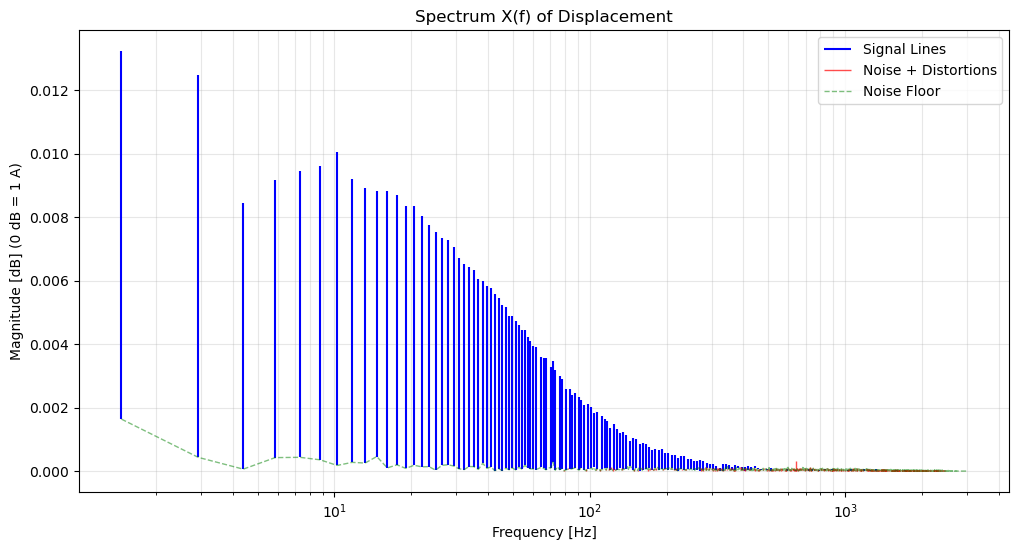

In [4]:
data_displacement_tf = klippel.load_klippel_spectrum_tf("data/lab b/measurement 1 - linear/Spectrum X(f) of voice coil displacement.txt")
plt.figure(figsize=(12, 6))

# ---------------------------------------------------------
# 1. PLOT SIGNAL (Using Vertical Lines)
# ---------------------------------------------------------
sig_df = data_displacement_tf['signal']

# We assume the data assumes a pattern of [Top, Bottom, Top, Bottom...]
# We separate them using array slicing [::2] (evens) and [1::2] (odds)
freqs = sig_df['freq'].iloc[::2].values
top_db = sig_df['db'].iloc[::2].values
bottom_db = sig_df['db'].iloc[1::2].values

# Safety check: ensure arrays are same length (in case file ended oddly)
min_len = min(len(freqs), len(top_db), len(bottom_db))
freqs = freqs[:min_len]
top_db = top_db[:min_len]
bottom_db = bottom_db[:min_len]

# vlines takes (x, ymin, ymax)
plt.vlines(x=freqs, ymin=bottom_db, ymax=top_db, 
           colors='blue', lw=1.5, label='Signal Lines')


# ---------------------------------------------------------
# 2. PLOT DISTORTION (Using Vertical Lines)
# ---------------------------------------------------------
# Distortions usually follow the same pattern in these files
dist_df = data_displacement_tf['distortion']
if not dist_df.empty:
    d_freqs = dist_df['freq'].iloc[::2].values
    d_top = dist_df['db'].iloc[::2].values
    d_bot = dist_df['db'].iloc[1::2].values
    
    # Safety slice
    d_min = min(len(d_freqs), len(d_top), len(d_bot))
    
    plt.vlines(x=d_freqs[:d_min], ymin=d_bot[:d_min], ymax=d_top[:d_min], 
               colors='red', lw=1.0, alpha=0.7, label='Noise + Distortions')


# ---------------------------------------------------------
# 3. PLOT NOISE FLOOR (Standard Line Plot)
# ---------------------------------------------------------
# Noise floor usually looks best as a continuous line along the bottom values
noise_df = data_displacement_tf['noise_floor']
if not noise_df.empty:
    # If noise floor data also duplicates (Top/Bottom), just plot the "Bottom" values
    # effectively decicmating the array to get a clean line
    n_freqs = noise_df['freq'].iloc[::2] 
    n_db = noise_df['db'].iloc[::2] 
    
    plt.plot(n_freqs, n_db, color='green', linestyle='--', 
             alpha=0.5, lw=1, label='Noise Floor')

# ---------------------------------------------------------
# FORMATTING
# ---------------------------------------------------------
plt.title("Spectrum X(f) of Displacement")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB] (0 dB = 1 A)")
plt.legend(loc='upper right')
plt.grid(True, which="both", ls="-", alpha=0.3)
plt.xscale('log') 

# Optional: Set limits if auto-scale is weird due to the vertical lines
# plt.ylim(-140, -40) 

plt.show()